# Regression

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/riccardoberta/machine-learning/blob/master/01-introduction/02-regression.ipynb)

Regression analysis consists of a set of machine learning methods that allow us to predict a continuous outcome variable (y) based on the value of one or multiple predictor variables (x). Briefly, the goal of regression model is to build a mathematical equation that defines y as a function of the x variables. Next, this equation can be used to predict the outcome (y) on the basis of new values of the predictor variables (x).

1. [Get the data](#Get-the-data)
    - [Laod the data](#Laod-the-data)
    - [Show data](#Show-data)
    - [Create a test set](#Create-a-test-set)
2. [Discover and visualize data](#Discover-and-visualize-data)
    - [Visualize geographical information](#Visualize-geographical-information)
    - [Looking for correlations](#Looking-for-correlations)
    - [Attribute combinations](#Attribute-combinations)
3. [Prepare data for ML](#Prepare-data-for-ML)
    - [Data cleaning](#Data-cleaning)
    - [Handling text and categorical attributes](#Handling-text-and-categorical-attributes)
    - [Custom transformers](#Custom-transformers)
    - [Feature scaling](#Feature-scaling)
    - [Pipelines](#Pipelines)
4. [Select and train a model](#Select-and-train-a-model)
    [Training and evaluating on the training set](#Training-and-evaluating-on-the-training-set)
5. [Cross-Validation](#Cross-Validation)
6. [Save the model](#Save-the-model)
7. [Fine-Tune the model](#Fine-Tune-the-model)
8. [Evaluate on the test set](#Evaluate-on-the-test-set)
9. [Exercises](#Exercises)

## Get the data

In ML projects we will spend an large fraction of your time acquiring, cleaning,
and transforming data.

We use California census data to build a model of housing prices in the state. This data includes metrics such as the population, median income, and median housing price for each block group in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data. We will call them “districts” for short. 

The model should learn from this data and be able to predict the median housing price in any district, given all the other metrics.

In typical environments your data would be available in a database and spread across multiple tables/documents/files. To access it, you would first familiarize yourself with the data schema. In this project, we will just download a single compressed file which contains a comma-separated values (CSV) file called housing.csv with all the data.
It is always preferable to create a small function to download the file and decompress it. Having a function is useful in particular if the data changes regularly: you can write a small script that uses the function to fetch the latest data. Automating the process of fetching the data is also useful if you need to install the dataset on multiple machines.

In [1]:
import urllib
import tarfile

def fetch_data(remote, local):
    urllib.request.urlretrieve(remote, local)
    tgz = tarfile.open(local)
    tgz.extractall("./data")
    tgz.close()
    
fetch_data("https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz", "data/housing.tgz" )


### Laod the data
Now let’s load the data using **pandas**. Once again, you should write a small function to load the data. Now we have a pandas **DataFrame object** containing all the data. We can take a look at the top rows using the **head()** method.

In [2]:
import pandas as pd

def load_data(csv):
    return pd.read_csv(csv)

data_set = load_data("data/housing.csv")

data_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


The **info()** method is useful to get a quick description of the data, in
particular the total number of rows, each attribute’s type, and the number of
nonnull values

In [3]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The **describe()** method shows a summary of the numerical attributes.

In [4]:
data_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


To get informaion about categorical attribute, it is possible to use the **value_counts()** method

In [5]:
data_set["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Show data
A quick way to get a feel of the type of data you are dealing with is to
plot a histogram for each numerical attribute. You can call the **hist()** method on the whole dataset.

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

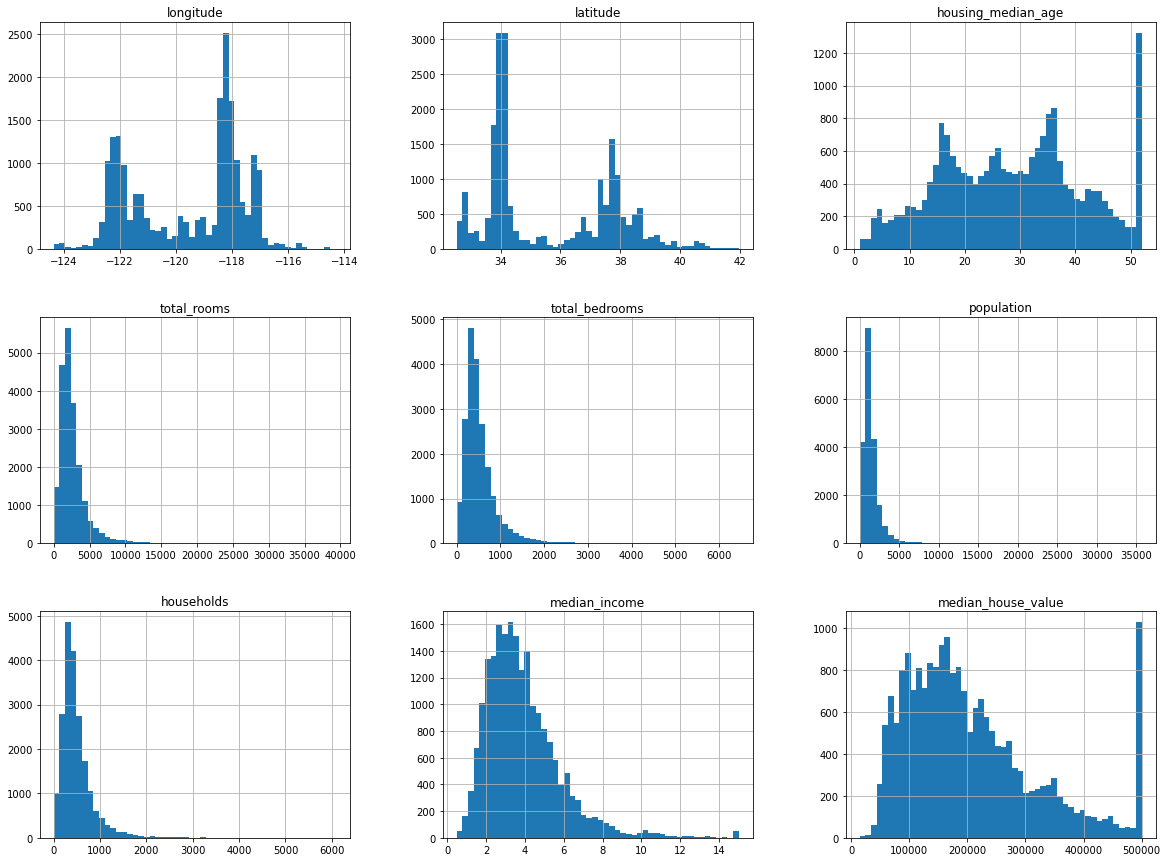

In [6]:
data_set.hist(bins=50, figsize=(20,15))

There are a few things you might notice in these histograms:

- the "median income" does not look like it is expressed in dollars. Data has been **scaled and capped** at 15 (actually, 15.0001) for higher median incomes, and at 0.5 for lower median incomes. The numbers represent roughly tens of thousands of dollars (e.g., 3 actually means about $30,000).

- The "housing median age" and the "median house value" were also **capped**. The latter may be a serious problem since it is the **target attribute**. The algorithms may learn that prices never go beyond that limit. Two options: collect proper labels, remove those districts from the dataset.

- Attributes have **very different scales**. 

- Many histograms are **tail-heavy** (extend much farther to the right of the median than to the left). This may make it a bit harder for some ML algorithms to detect patterns. 

Working with preprocessed attributes is common in ML, and it is not necessarily a problem, but you should try to understand how the data was computed.

### Create a test set

A common danger in machine learning is **overfitting**, producing a model that performs well on the data you train it on but generalizes poorly to any new data. This could involve learning noise in the data. Or it could involve learning to identify specific inputs rather thanwhatever factors are actually predictive for the desired output. The other side of this is **underfitting**, producing a model that doesn’t perform well even on the training data, although typically when this happens you decide your model isn’t good enough and keep looking for a better one. Clearly, models that are too complex lead to overfitting and don’t generalize well beyond the data they were trained on. So how do we make sure our models aren’t too complex? The most fundamental approach involves using different data to train the model and to test the model.

Before you look at the data any further, you need to create a **test set**, put it aside, and never look at it! It may sound strange to voluntarily set aside part of the data at this stage. After all, you have only taken a quick glance at the data, and surely you should learn a whole lot more about it before you decide what algorithms to use, right? This is true, but your brain is an amazing pattern detection system, which means
that it is highly prone to overfitting: if you look at the test set, you may stumble
upon some seemingly interesting pattern in the test data that leads you to select
a particular kind of Machine Learning model. This is called **data snooping bias**.

Creating a test set is theoretically simple: pick some instances randomly (typically 20%) of the dataset and set them aside.

In [7]:
import random

from typing import List, Tuple, TypeVar

X = TypeVar('X') # generic type to represent a data point

def split_data(data: List[X], prob: float) -> Tuple[List[X], List[X]]:
    """Split data into fractions [prob, 1 - prob]"""
    data = data[:]                    # Make a shallow copy
    random.shuffle(data)              # because shuffle modifies the list.
    cut = int(len(data) * prob)       # Use prob to find a cutoff
    return data[:cut], data[cut:]     # and split the shuffled list there.


In [8]:
train, test = split_data(data_set.values.tolist(), 0.80)
print(len(train))
print(len(test))

16512
4128


Often, we’ll have paired input variables and output variables. In that case, we need to make sure to put corresponding values together in either the training data or the test data:

In [9]:
Y = TypeVar('Y')  # generic type to represent output variables

def train_test_split(xs: List[X], ys: List[Y], test_pct: float) -> Tuple[List[X], List[X], List[Y], List[Y]]:
    # Generate the indices and split them.
    idxs = [i for i in range(len(xs))]
    train_idxs, test_idxs = split_data(idxs, 1 - test_pct)
    return ([xs[i] for i in train_idxs],  # x_train
            [xs[i] for i in test_idxs],   # x_test
            [ys[i] for i in train_idxs],  # y_train
            [ys[i] for i in test_idxs])   # y_test


If a model was overfit to the training data, then it will hopefully perform really poorly on the (completely separate) test data. Said differently, if it performs well on the test data, then you can be more confident that it’s fitting rather than overfitting.

This works, but it is not perfect: if you run the program again, it will generate a different test set! Over time, you will get to see the whole dataset, which is what you want to avoid.

One solution is to **save the test set on the first run and then load it in subsequent runs**. Another option is to **set the random number generator’s seed** so that it always generates the same shuffled indices.

But these solutions will break the next time you fetch an updated dataset.

To have a **stable train/test split** even after updating the dataset, a common
solution is to use each instance’s **identifier** to decide whether or not it should
go in the test set. For example, you could compute a hash of each instance’s identifier and put that instance in the test set if the hash is lower than or equal to 20% of the maximum hash value. This ensures that the test set will remain consistent across multiple runs, even if you refresh the dataset. 

**Scikit-Learn** provides a few functions to split datasets into multiple subsets in
various ways. The simplest function is **train_test_split()**, :

In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_set, test_size=0.2, random_state=42)

In [11]:
len(train_set)

16512

In [12]:
len(test_set)

4128

So far we have considered **purely random sampling methods**. This is generally fine if your dataset is large enough, but if it is not, you run the risk of introducing a significant **sampling bias**. 

Suppose that the "median income" is a very important attribute to predict median housing prices. You may want to ensure that **the test set is representative** of the various categories of incomes in the whole dataset. Since it is a continuous numerical
attribute, you need to create an category attribute. Let’s look at the histogram more closely.

<AxesSubplot:>

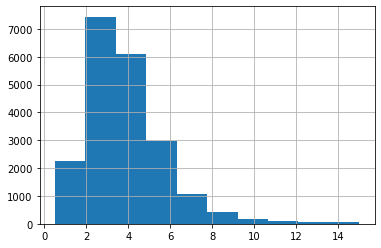

In [13]:
data_set["median_income"].hist()

We can use the **cut()** method in order to create an "income" **category attribute** with five categories (labeled from 1 to 5).

<AxesSubplot:>

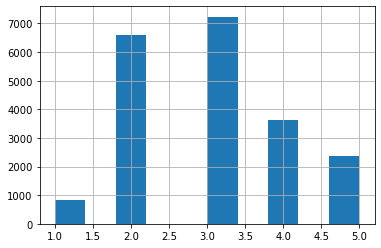

In [14]:
import numpy as np

data_set["income_cat"] = pd.cut(data_set["median_income"],
                                bins=[0., 1.5, 3.0, 4.5, 6., np.inf], 
                                labels=[1, 2, 3, 4, 5])
data_set["income_cat"].hist()

We can now use **stratified sampling**: the population is divided into homogeneous subgroups called **strata**, and the right number of instances are sampled from each stratum to guarantee that the test set is representative of the overall population. 

Ww can use the Scikit-Learn’s **StratifiedShuffleSplit class**

In [15]:
import sklearn as skl

split = skl.model_selection.StratifiedShuffleSplit(n_splits=1, 
                                                   test_size=0.2, 
                                                   random_state=42)
for train_index, test_index in split.split(data_set, data_set["income_cat"]):
    strat_train_set = data_set.loc[train_index]
    strat_test_set = data_set.loc[test_index]
    
random_train_set, random_test_set = skl.model_selection.train_test_split(data_set, 
                                                                         test_size=0.2, 
                                                                         random_state=42)

proportions = { 'strat_test_set': strat_test_set["income_cat"].value_counts() / len(strat_test_set),     
                'strat_train_set': strat_train_set["income_cat"].value_counts() / len(strat_train_set),
                'data_set': data_set["income_cat"].value_counts() / len(data_set),
                'random_train_set': random_train_set["income_cat"].value_counts() / len(random_train_set),
                'random_test_set': random_test_set["income_cat"].value_counts() / len(random_test_set)
              }

proportions_df = pd.DataFrame(data = proportions, index=[1, 2, 3, 4, 5])

proportions_df.head()

,strat_test_set,strat_train_set,data_set,random_train_set,random_test_set
1,0.039729,0.039850,0.039826,0.039729,0.040213
2,0.318798,0.318859,0.318847,0.317466,0.324370
3,0.350533,0.350594,0.350581,0.348595,0.358527
4,0.176357,0.176296,0.176308,0.178537,0.167393
5,0.114583,0.114402,0.114438,0.115673,0.109496


The table compares the "income" category proportions in the overall
dataset, in the test set generated with stratified sampling, and in a test set generated using purely random sampling. As you can see, the test set generated using stratified sampling has income category proportions almost identical to those in the full dataset, whereas the test set generated using purely random sampling is skewed.

Now you should remove the income_cat attribute so the data is back to its original state.

In [16]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Discover and visualize data

First, make sure you have put the test set aside and you are only exploring the training set. Also, if the training set is very large, you may want to sample an exploration set, to make manipulations easy and fast. In our case, the set is quite small, so you can just work directly on the full set.

Let’s create a copy so that you can play with it without harming the training set.

In [17]:
exploration_set = strat_train_set.copy()

### Visualize geographical information

Since there is geographical information (latitude and longitude), it is a good idea to create a scatterplot of all districts to visualize the data. Setting the alpha option to 0.1 makes it much easier to visualize the places where there is a high density of data points.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

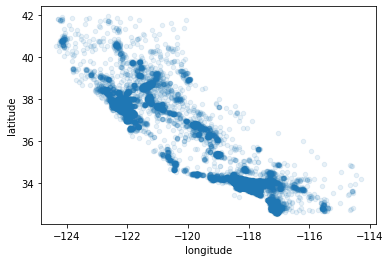

In [18]:
exploration_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Now let’s look at other attribure using circle color and size. 
The radius of each circle represents the district’s population (option s), and the color represents the price
(option c).

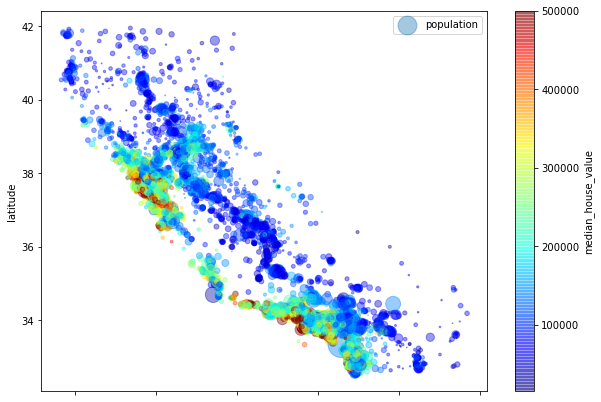

In [19]:
import matplotlib.pyplot as plt

exploration_set.plot(kind="scatter", 
                     x="longitude", 
                     y="latitude", 
                     alpha=0.4,
                     s=exploration_set["population"]/50, 
                     label="population", 
                     figsize=(10,7),
                     c="median_house_value", 
                     cmap=plt.get_cmap("jet"), 
                     colorbar=True
)
plt.legend()

The image tells that the housing prices are very much related to the location (e.g., close to the ocean) and to the population density.
A clustering algorithm should be useful for detecting the main cluster and for adding new features that measure the proximity to the
cluster centers.

### Looking for correlations
Since the dataset is not too large, we can easily compute the **standard correlation coefficient** between every pair of attributes using the **corr()** method. Thie coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; when the coefficient is close to –1, it means that there is a strong negative correlation;  coefficients close to 0 mean that there is no linear correlation.
The correlation coefficient **only measures linear correlations** (“if x goes up, then y generally goes up/down”). It may completely miss out on nonlinear relationships.

In [20]:
corr_matrix = exploration_set.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

the "median house value" tends to go up when the "median income" goes up; we can see also a small negative correlation between the "latitude" and the "median house value"

Another way to check for correlation between attributes is to use the **scatter_matrix()** function, which plots every numerical attribute against
every other numerical attribute. We can focus on a few promising attributes that seem most correlated with the "median housing value". The main diagonal  would be full of straight lines if pandas plotted each variable against itself, which would not be very useful. So
instead pandas displays a histogram of each attribute.

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

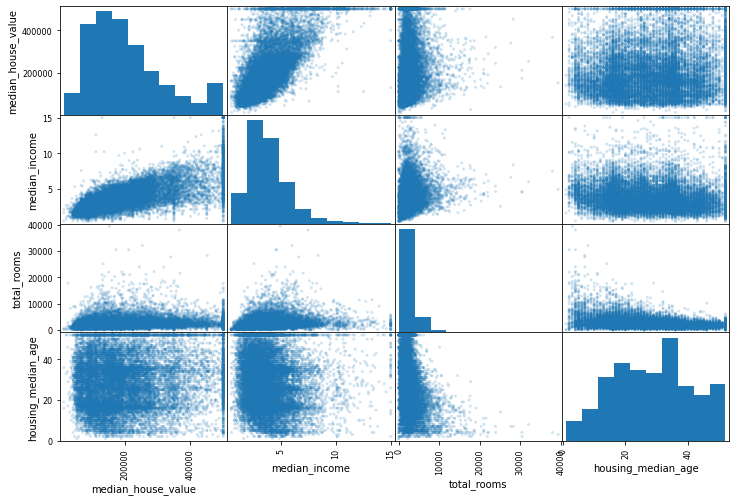

In [21]:
pd.plotting.scatter_matrix(exploration_set[["median_house_value", "median_income", "total_rooms", "housing_median_age"]], 
                           figsize=(12, 8),
                           alpha=0.2)

The most promising attribute to predict the "median house value" is the "median income"

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

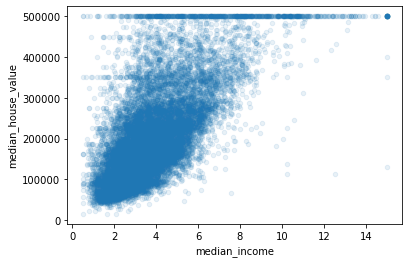

In [22]:
exploration_set.plot(kind="scatter", 
                     x="median_income", 
                     y="median_house_value",
                     alpha=0.1)

This plot reveals a few things:
- the correlation is very strong, you can clearly see the upward trend, and the points are not too dispersed,
- the price cap that we noticed earlier is clearly visible as a horizontal line at the top,
- the plot reveals other less obvious straight horizontl lines, you may want to try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks.

### Attribute combinations
One last thing you may want to do before preparing the data for ML algorithms is to try out various attribute combinations. 

For example, the "total number of rooms" in a district is not very useful if you don’t know how many households there are. What you really want is the number of "rooms per household". Similarly, the "total number of bedrooms" by itself is not very useful: you probably want to compare it to the number of rooms. And the population per household also seems like an interesting attribute combination to look at.

Let’s create these new attributes.

In [23]:
exploration_set["rooms_per_household"] = exploration_set["total_rooms"]/exploration_set["households"]
exploration_set["bedrooms_per_room"] = exploration_set["total_bedrooms"]/exploration_set["total_rooms"]
exploration_set["population_per_household"] = exploration_set["population"]/exploration_set["households"]

corr_matrix = exploration_set.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

The new "bedrooms_per_room" attribute is much more correlated than the total number of rooms or bedrooms. Apparently houses with a lower bedroom/room ratio tend to be more expensive. The number of rooms per household is also more informative than
the total number of rooms in a district—obviously the larger the houses, the more expensive they are.

This round of exploration does not have to be absolutely thorough; the point is to start off on the right foot and quickly gain insights that will help you get a first reasonably good prototype. But this is an iterative process: once you get a prototype up and running, you can analyze its output to gain more insights and come back to this exploration step.

## Prepare data for ML
It’s time to prepare the data for your ML. You should write functions for this purpose:
- allow you to reproduce these transformations easily on any dataset
- gradually build a library of transformation functions that you can reuse in future projects
- use these functions in your live system to transform the new data before feeding it to your algorithms
- easily try various transformations and see which combination works best

First revert to a clean training set and separate the predictors and the labels.

In [24]:
predictors = strat_train_set.drop("median_house_value", axis=1)
labels = strat_train_set["median_house_value"].copy()

### Data cleaning
ML algorithms cannot work with **missing features**. You have three options:
- Get rid of the corresponding sample
- Get rid of the whole attribute
- Set the values to some value (zero, the mean, the median, etc.).

You can accomplish these easily using **dropna()**, **drop()**, and **fillna()** methods. 

Otherwise, Scikit-Learn provides a handy class to take care of missing values **SimpleImputer**. You have to create an instance, specifying that you want to replace each missing values with the median of that attribute. Since the median can only be computed on numerical attributes, you need to create a copy of the dataset without non-numerical attributes. Now you can fit the imputer instance to the training data using the **fit()** method. The imputer has computed the median of each attribute and stored the result in its statistics_ instance variable. 

In the example, we know than only "total_bedrooms" had missing values, but we cannot be sure that there won’t be any missing values in new data after the system goes live, so it is safer to apply the imputer to all the numerical attributes.
 

In [25]:
# predictors.dropna(subset=["total_bedrooms"]) # first option
# predictors.drop("total_bedrooms", axis=1) # second option
# predictors["total_bedrooms"].fillna(predictors["total_bedrooms"].median(), inplace=True) #third option

In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
predictors_num = predictors.drop("ocean_proximity", axis=1)
predictors_num = pd.DataFrame(imputer.fit_transform(predictors_num), 
                          columns=predictors_num.columns,
                          index=predictors_num.index)

### Handling text and categorical attributes
If an attribute doesn't contains arbitrary text, but there are a limited number of possible values, then this attribute is a **categorical attribute**. Most ML algorithms prefer to work with numbers, so we need to convert these categories from text to numbers. 

It is possible to use the Scikit-Learn’s **OrdinalEncoder**. The encoder manteins the list of categories using the "categories_" instance variable. It is a list containing a vector of categories for each categorical attribute.

In the example, we have the "ocean_proximity" attribute.

In [27]:
from sklearn.preprocessing import OrdinalEncoder
predictors_cat = predictors[["ocean_proximity"]]
print(predictors_cat[:10])
ordinal_encoder = OrdinalEncoder()
predictors_cat_encoded = ordinal_encoder.fit_transform(predictors_cat)
print(predictors_cat_encoded[:10])
print(ordinal_encoder.categories_)

      ocean_proximity
17606       <1H OCEAN
18632       <1H OCEAN
14650      NEAR OCEAN
3230           INLAND
3555        <1H OCEAN
19480          INLAND
8879        <1H OCEAN
13685          INLAND
4937        <1H OCEAN
4861        <1H OCEAN
[[0.]
 [0.]
 [4.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. This may be fine in some cases (e.g., for ordered categories such as “bad,” “average,” “good,” and “excellent”)

It is not the case for the "ocean_proximity" column. To fix this issue, a common solution is the **one-hot encoding** that create one binary attribute per category (attributes equal to 1 for the correspondinf category and 0 otherwise).

Scikit-Learn provides the **OneHotEncoder** class to convert categorical values into one-hot vectors. The output is a SciPy **sparse matrix**. After one-hot encoding, we get a matrix with several of columns, and the matrix is full of 0s except for a single 1 per row, using memory mostly to store zeros. The sparse representation only stores the location of the nonzero elements. If you really want to convert it to a (dense) NumPy array, just call the toarray() method.

If a categorical attribute has a large number of possible categories, then one-hot encoding will result in a large number of input features. This may slow down training and degrade performance. If this happens, you may want to replace the categorical input with useful numerical features related to the categories: for example, you could replace the ocean_proximity feature with the distance to the ocean.  

In [28]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
predictors_cat_1hot = cat_encoder.fit_transform(predictors_cat)
print(predictors_cat_1hot[:10])
predictors_cat_1hot.toarray()

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 4)	1.0
  (3, 1)	1.0
  (4, 0)	1.0
  (5, 1)	1.0
  (6, 0)	1.0
  (7, 1)	1.0
  (8, 0)	1.0
  (9, 0)	1.0


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

### Custom transformers
Although Scikit-Learn provides many useful transformers, you will need to **write your own transformer** for tasks such as custom cleanup operations or combining specific attributes. 

To work seamlessly with Scikit-Learn, you need to create a class and implement three methods: **fit()**, **transform()** and **fit_transform()**.

You can get the last one for free by simply adding **TransformerMixin** as a base class. If you add **BaseEstimator** as a base class you will also get two extra methods (get_params() and set_params()) that will be useful for automatic hyperparameter tuning.

The transformer can have hyperparameters (it is often helpful to provide ensible defaults) to gate any data preparation step that you are not sure about: the more you automate data preparation steps, the more combinations you can automatically try out, making it much more likely that you will find a great combination (and saving a lot of time).

For example, we create a transformer to add the combined attributes discussed earlier.

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
predictors_attribs = attr_adder.transform(predictors.values)
print(predictors.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   

       population  households  median_income ocean_proximity  
17606       710.0       339.0         2.7042       <1H OCEAN  
18632       306.0       113.0         6.4214       <1H OCEAN  
14650       936.0       462.0         2.8621      NEAR OCEAN  
3230       1460.0       353.0         1.8839          INLAND  
3555       4459.0      1463.0         3.0347       <1H OCEAN  


### Feature scaling
ML algorithms don’t perform well when the numerical attributes have very different scales. There are two common ways to get all attributes to have the same scale: **minmax
scaling** and **standardization**.

In Min-max scaling (**normalization**) values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting the min value and dividing by the max minus the min. S

Standardization subtracts the mean value and then it divides by the standard deviation so that the resulting distribution has unit variance. Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms, however, it is much less affected by **outliers**. provides a transformer called StandardScaler for standardization

Scikit-Learn provides a transformers called **MinMaxScaler** and **StandardScaler** for this.

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaling_encoder = MinMaxScaler()
predictors_scaled = scaling_encoder.fit_transform(predictors_num)
print(predictors_scaled[:10])

[[0.24501992 0.50478215 0.7254902  0.03973139 0.05621778 0.01981558
  0.06292009 0.15201859]
 [0.24103586 0.47927736 0.25490196 0.01711858 0.01707474 0.00849239
  0.02072442 0.40837368]
 [0.71215139 0.02444208 0.58823529 0.04949891 0.07554768 0.02614984
  0.08588499 0.1629081 ]
 [0.47211155 0.40063762 0.47058824 0.0468281  0.05943943 0.04083635
  0.06553398 0.09544696]
 [0.57370518 0.17959617 0.31372549 0.16752302 0.24532861 0.12489139
  0.27277819 0.17481138]
 [0.33665339 0.54410202 0.45098039 0.07437554 0.09439433 0.04050001
  0.10604929 0.20962469]
 [0.58266932 0.15940489 1.         0.05664649 0.05074098 0.02146921
  0.05134429 0.54371664]
 [0.70816733 0.17109458 0.49019608 0.05176273 0.046875   0.02614984
  0.06964152 0.37931201]
 [0.60657371 0.15409139 0.90196078 0.04728595 0.07458119 0.05361697
  0.08140403 0.09132977]
 [0.60458167 0.15727949 0.54901961 0.01294704 0.03656572 0.07531041
  0.0401419  0.        ]]


### Pipelines
Scikit-Learn provides the **Pipeline** class to help with the sequences of transformations. The constructor takes a list of estimators defining a sequence of steps. All the last estimator must be transformers (must have a fit_transform() method).  When you call the pipeline’s fit() method, it calls fit_transform() sequentially on all transformers, passing the output of each call as the
parameter to the next call until it reaches the final estimator. The pipeline exposes the same methods as the final estimator. 

In [31]:
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([ ('imputer', SimpleImputer(strategy="median")),
                      ('attribs_adder', CombinedAttributesAdder()),
                      ('std_scaler', MinMaxScaler()) ])
predictors_num_tr = num_pipeline.fit_transform(predictors_num)

So far, we have handled the "categorical" columns and the "numerical" columns separately. It would be more convenient to have a single transformer able to handle all columns, applying the appropriate transformations to each column. Scikit-Learn introduced the **ColumnTransformer** for this purpose. The constructor requires a list of tuples, where each tuple contains a name, a transformer, and a list of names of columns that the transformer should be applied to. 

When there is a mix of sparse and dense matrices, the ColumnTransformer estimates the density of the final matrix and it returns a sparse matrix if the density is lower than a given threshold (by default, sparse_threshold=0.3). 

Instead of using a transformer, you can specify the string **drop** if you want the columns to
be dropped, or you can specify **passthrough** if you want the columns to be left
untouched. By default, the remaining columns (i.e., the ones that were not listed) will be
dropped.

In [32]:
from sklearn.compose import ColumnTransformer
num_attribs = list(predictors_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([ ("num", num_pipeline, num_attribs),
                                    ("cat", OneHotEncoder(), cat_attribs) ])
predictors_prepared = full_pipeline.fit_transform(predictors)

## Select and train a model
We framed the problem, we got the data and explored it, we sampled a training set and a test set, and we wrote transformation pipelines to clean up and prepare data for ML.

We are now ready to select and train a ML model.

### Training and evaluating on the training set

First, we train a Linear Regression model

In [33]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(predictors_prepared, labels)

LinearRegression()

Done! We now have a working Linear Regression model. Let’s try it out on a
few instances from the training set:

In [34]:
some_data = predictors.iloc[:5]
some_labels = labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


It works, although the predictions are not exactly accurate.

Let’s measure this regression model’s RMSE on the whole training set using Scikit-Learn’s **mean_squared_error()** function.

In [35]:
from sklearn.metrics import mean_squared_error
predictions = lin_reg.predict(predictors_prepared)
lin_mse = np.sqrt(mean_squared_error(labels, predictions))
print(lin_mse)

68628.19819848922


Clearly not a great score: most districts median_housing_values range between $120,000 and $265,000, so a prediction error of $68,628 is not very satisfying. 

This is an example of a model **underfitting** the training data. When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough. 

The main ways to fix underfitting are:
- to select a more powerful model,
- to feed the training algorithm with better features, 
- to reduce the constraints on the model. 

Let’s try a more complex model, a Decision Tree.

In [36]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(predictors_prepared, labels)

predictions = tree_reg.predict(predictors_prepared)
tree_mse = np.sqrt(mean_squared_error(labels, predictions))
print(tree_mse)

0.0


No error at all? Could this model really be absolutely perfect? It is much more likely that the model has **overfit** the data. How can you be sure? We don’t want to touch the test set until we are ready to launch a model you are confident about, so you need to use
part of the training set for training and part of it for **model validation**.

Let’s try one last model now: the **RandomForestRegressor**, it works by training many Decision Trees on random subsets of the features, then averaging out their predictions. Building a model on top of many other models is called **Ensemble Learning**, and it is often a great way to push ML algorithms even further.

In [37]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(predictors_prepared, labels)

predictions = forest_reg.predict(predictors_prepared)
forest_mse = np.sqrt(mean_squared_error(labels, predictions))
print(forest_mse)

18793.97916379694


Mmm...it looks like not so good as Decision Tree, but much better that Linear Regressor. We need more information on how to compare models.

## Cross-Validation
We can use the Scikit-Learn’s **K-fold cross-validation** feature, it randomly splits the training set into K distinct subsets (called folds), then it trains and evaluates the model N times, picking a different fold for evaluation every time and training on the other (N-1) folds. The result is an array containing the N evaluation scores.

In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, 
                         predictors_prepared, 
                         labels,
                         scoring="neg_mean_squared_error", 
                         cv=10)
tree_rmse_scores = np.sqrt(-scores)

print("Scores:", tree_rmse_scores)
print("Mean:", tree_rmse_scores.mean())
print("Standard deviation:", tree_rmse_scores.std())

Scores: [67923.35765439 66039.8836737  70100.96665282 68841.27790848
 70015.23721273 74477.30357926 70974.77293897 71335.89558187
 75090.85033504 68540.38862308]
Mean: 70333.99341603348
Standard deviation: 2665.7228135600417


Now the Decision Tree doesn’t look as good as it did earlier. In fact, it seems to perform worse than the Linear Regression model. Notice that cross-validation
allows you to get not only an estimate of the performance of your model, but
also a measure of how precise this estimate is (standard deviation). 

Let’s compute the same scores for the Linear Regression model just to be sure.

In [39]:
lin_scores = cross_val_score(lin_reg, 
                             predictors_prepared, 
                             labels,
                             scoring="neg_mean_squared_error", 
                             cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)

print("Scores:", lin_rmse_scores)
print("Mean:", lin_rmse_scores.mean())
print("Standard deviation:", lin_rmse_scores.std())

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798337


The Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model. What about the RandomForest?

In [40]:
forest_scores = cross_val_score(forest_reg,
                                predictors_prepared, 
                                labels,
                                scoring="neg_mean_squared_error", 
                                cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)

print("Scores:", forest_rmse_scores)
print("Mean:", forest_rmse_scores.mean())
print("Standard deviation:", forest_rmse_scores.std())

Scores: [49471.79139425 47748.70198939 49841.26876684 52527.25758682
 49894.65949345 53185.09748684 48871.54702256 48002.57171803
 53122.54262292 50182.97468934]
Mean: 50284.841277044856
Standard deviation: 1901.3429123393885


This is much better, Random Forests look very promising. However, note that the score on the training set is still much lower than on the validation sets,
meaning that the model is still overfitting the training set. 

Possible solutions for overfitting are to simplify the model, constrain it (i.e., regularize it), or get a lot more training data. Before you dive much deeper into Random Forests, however, you should try out many other models from various categories of ML algorithms (e.g., **Support Vector Machines** with different kernels, and possibly a **neural network**), without spending too much time tweaking the hyperparameters. The goal is to shortlist a few (two to five) promising models.

## Save the model
You should save every model you experiment with so that you can come back easily to any
model you want. Make sure you save both the hyperparameters and the trained parameters,
as well as the cross-validation scores and perhaps the actual predictions as well. This will allow you to easily compare scores across model types, and compare the types of errors they make. You can easily save Scikit-Learn models by using the **joblib library**

In [41]:
import joblib
joblib.dump(forest_reg, "data/forest_reg.pkl")

# when you need it...
my_model_loaded = joblib.load("data/forest_reg.pkl")

## Fine-Tune the model
Let’s assume that you now have a shortlist of promising models. You now need to fine-tune them.

One option would be to fiddle with the hyperparameters manually, until you find a great combination of hyperparameter values. This would be very tedious work, and you may not have time to explore many combinations. Instead, you should get Scikit-Learn’s **GridSearchCV** to search for you. All you need to do is tell it which hyperparameters you want it to experiment with and what values to try out, and it will use cross-validation to evaluate all the possible combinations of hyperparameter values. 

When you have no idea what value a hyperparameter should have, a simple approach is to
try out consecutive powers of 10 (or a smaller number if you want a more fine-grained search). It may take quite a long time, but when it is done you can get the best combination of parameters.

For example, the following code searches for the best combination of hyperparameter values for the RandomForestRegressor. Don’t worry about what the hyperparameters mean
for now (they will be explained in a Jupyter file focused on RandomForest).

In [42]:
from sklearn.model_selection import GridSearchCV
param_grid = [ {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
               {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]} ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, 
                           param_grid, 
                           cv=5, 
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(predictors_prepared, labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

Then you can get the best combination of parameters:

In [43]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

You can also get the best estimator directly:

In [44]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

And of course the evaluation scores are also available:

In [45]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63818.514016515255 {'max_features': 2, 'n_estimators': 3}
55383.95646810015 {'max_features': 2, 'n_estimators': 10}
52956.32426731428 {'max_features': 2, 'n_estimators': 30}
60824.75793716369 {'max_features': 4, 'n_estimators': 3}
52944.76745398838 {'max_features': 4, 'n_estimators': 10}
50500.721578421086 {'max_features': 4, 'n_estimators': 30}
59281.294286604265 {'max_features': 6, 'n_estimators': 3}
51642.8503628604 {'max_features': 6, 'n_estimators': 10}
50391.63156994901 {'max_features': 6, 'n_estimators': 30}
57814.16263299305 {'max_features': 8, 'n_estimators': 3}
51577.46878012364 {'max_features': 8, 'n_estimators': 10}
49824.089256203275 {'max_features': 8, 'n_estimators': 30}
62450.53031417791 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54076.77076396796 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60195.91604568917 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51905.96624506935 {'bootstrap': False, 'max_features': 3, 'n_estimators':

The grid search approach is fine when you are exploring relatively few
combinations, but when the hyperparameter search space is large, it is often preferable to use **RandomizedSearchCV** instead. This class can be used in much the same way as the GridSearchCV class, but instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each
hyperparameter at every iteration. This approach has two main benefits:
- if you let the randomized search run for, say, 1,000 iterations, this approach will explore 1,000 different values for each hyperparameter (instead of just a few values per hyperparameter with the grid search approach);
- simply by setting the number of iterations, you have more control over the computing budget you want to allocate to hyperparameter search.

You will often gain good insights on the problem by **inspecting the best
models**.  For example, the RandomForestRegressor can indicate the relative importance of each attribute for making accurate predictions. With this information, you may want to try dropping some of the less useful features.

In [46]:
feature_importances = grid_search.best_estimator_.feature_importances_

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.35137722856591763, 'median_income'),
 (0.15985582611091256, 'INLAND'),
 (0.11301466611538881, 'pop_per_hhold'),
 (0.09195998805900145, 'bedrooms_per_room'),
 (0.06812770900472964, 'longitude'),
 (0.061681099862519066, 'latitude'),
 (0.044499526546830086, 'housing_median_age'),
 (0.041150729980370095, 'rooms_per_hhold'),
 (0.015536911164821, 'total_rooms'),
 (0.014921214369019112, 'population'),
 (0.014614578808881007, 'total_bedrooms'),
 (0.0142906006062283, 'households'),
 (0.003267660507906255, '<1H OCEAN'),
 (0.002859749204450536, 'NEAR OCEAN'),
 (0.0027775492796139885, 'NEAR BAY'),
 (6.49618134105233e-05, 'ISLAND')]

Apparently only one "ocean_proximity" category is really useful, so you could try dropping the others.

## Evaluate on the test set
After tweaking your models for a while, you eventually have a system that performs sufficiently well. Now is the time to evaluate the final model on the test set. There is nothing special about this process; just get the predictors and the labels from your test set, run your full_pipeline to transform the data (call transform(), not fit_transform()), and evaluate the final model on the test set.

In [47]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

48517.808899227784


In some cases, such a point estimate of the generalization error will not be quite enough to convince you to launch. You might want to have an idea of how precise
this estimate is. For this, you can compute a 95% confidence interval for the generalization error using **scipy.stats.t.interval()**

In [48]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([46465.28625031, 50486.95608214])

If you did a lot of hyperparameter tuning, the performance will usually be slightly worse than what you measured using cross-validation (because your system ends up fine-tuned to perform well on the validation data and will likely not perform as well on unknown datasets). 

It is not the case in this example, but when this happens **you must resist the temptation to tweak the hyperparameters to make the numbers look good on the test set**; the improvements would be unlikely to generalize to new data.

## Exercises

**1 - Try a Support Vector Machine regressor (`sklearn.svm.SVR`), with various hyperparameters such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters).  How does the best SVM predictor perform?**

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = [ {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
               {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0], 'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]} ]

svm_reg = skl.svm.SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(predictors_prepared, labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ C=10.0, kernel=linear, total=   4.7s
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


[CV] ............................ C=10.0, kernel=linear, total=   4.7s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   4.7s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   4.8s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   4.7s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   4.6s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   4.6s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   4.5s
[CV] C=30.0, kernel=linear ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 29.0min finished


GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

The best model achieves the following score (evaluated using 5-fold cross validation):

In [54]:
rmse = np.sqrt(-grid_search.best_score_)
print(rmse)

71364.02564195872


That's much worse than the RandomForestRegressor. Let's check the best hyperparameters found:

In [49]:
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}

The linear kernel seems better than the RBF kernel. Notice that the value of *C* is the maximum tested value. When this happens you definitely want to launch the grid search again with higher values for *C* (removing the smallest values), because it is likely that higher values of *C* will be better.

**2 - Try replacing GridSearchCV with RandomizedSearchCV** 

In [60]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_distribs = { 'kernel': ['linear', 'rbf'],
                   'C': uniform(20, 200000),
                   'gamma': uniform(0.01, 5.0) }
svm_reg = skl.svm.SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(predictors_prepared, labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=74928.0237694725, gamma=4.76357153204958, kernel=linear .......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=74928.0237694725, gamma=4.76357153204958, kernel=linear, total=   5.4s
[CV] C=74928.0237694725, gamma=4.76357153204958, kernel=linear .......


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


[CV]  C=74928.0237694725, gamma=4.76357153204958, kernel=linear, total=   5.4s
[CV] C=74928.0237694725, gamma=4.76357153204958, kernel=linear .......
[CV]  C=74928.0237694725, gamma=4.76357153204958, kernel=linear, total=   5.5s
[CV] C=74928.0237694725, gamma=4.76357153204958, kernel=linear .......
[CV]  C=74928.0237694725, gamma=4.76357153204958, kernel=linear, total=   4.9s
[CV] C=74928.0237694725, gamma=4.76357153204958, kernel=linear .......
[CV]  C=74928.0237694725, gamma=4.76357153204958, kernel=linear, total=   4.8s
[CV] C=155958.20005455386, gamma=2.9942507897324346, kernel=rbf ......
[CV]  C=155958.20005455386, gamma=2.9942507897324346, kernel=rbf, total=   8.0s
[CV] C=155958.20005455386, gamma=2.9942507897324346, kernel=rbf ......
[CV]  C=155958.20005455386, gamma=2.9942507897324346, kernel=rbf, total=  11.2s
[CV] C=155958.20005455386, gamma=2.9942507897324346, kernel=rbf ......
[CV]  C=155958.20005455386, gamma=2.9942507897324346, kernel=rbf, total=   9.7s
[CV] C=155958.2000

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 25.9min finished


RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f90bd2060d0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f90bc68ec10>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

The best model achieves the following score (evaluated using 5-fold cross validation):

In [62]:
rmse = np.sqrt(-rnd_search.best_score_)
print(rmse)

58592.154868254904


Now this is much closer to the performance of the RandomForestRegressor (but not quite there yet). Let's check the best hyperparameters found:

In [63]:
rnd_search.best_params_

{'C': 193936.9255529117, 'gamma': 3.8856641168055726, 'kernel': 'rbf'}

This time the search found a good set of hyperparameters for the RBF kernel. Randomized search tends to find better hyperparameters than grid search.